# Medical Insurance Cost Prediction

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

### Importing the dataset

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of age value

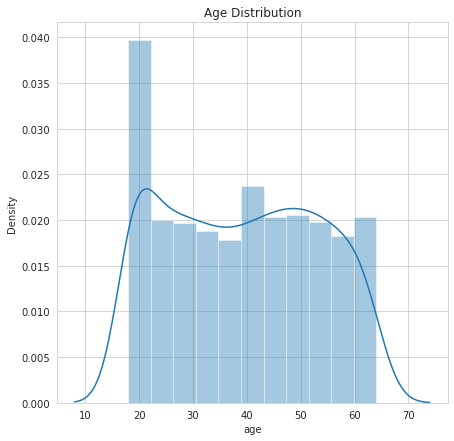

In [7]:
plt.figure(figsize=(7, 7))
sns.distplot(df.age, kde = True)
plt.title('Age Distribution')
plt.show()

#### Gender counts

In [8]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

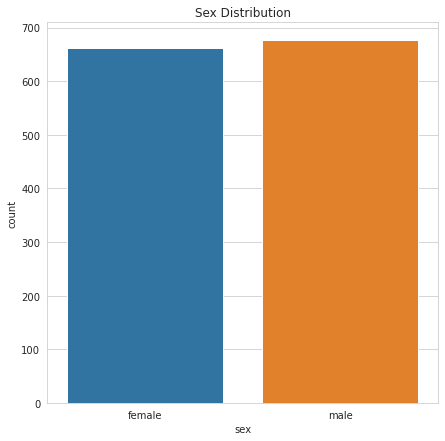

In [9]:
plt.figure(figsize=(7, 7))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

#### Gender counts with respect to smoker

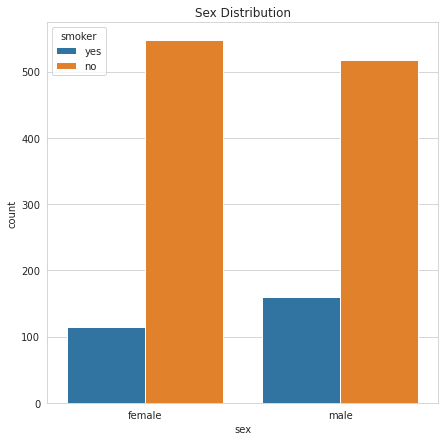

In [10]:
plt.figure(figsize=(7, 7))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Sex Distribution')
plt.show()

#### BMI Distribution

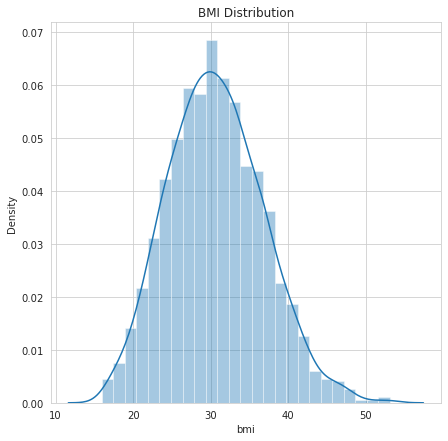

In [11]:
plt.figure(figsize=(7, 7))
sns.distplot(df.bmi, kde = True)
plt.title('BMI Distribution')
plt.show()

#### Children Count

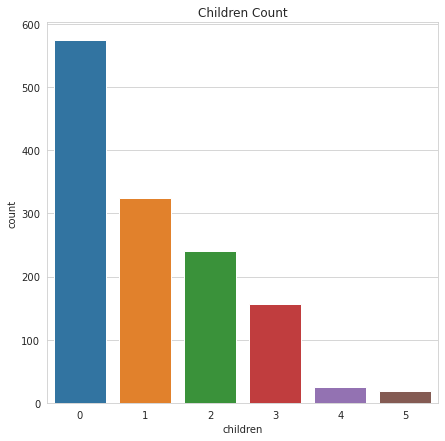

In [12]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'children', data=df)
plt.title('Children Count')
plt.show()

#### Smoker Count

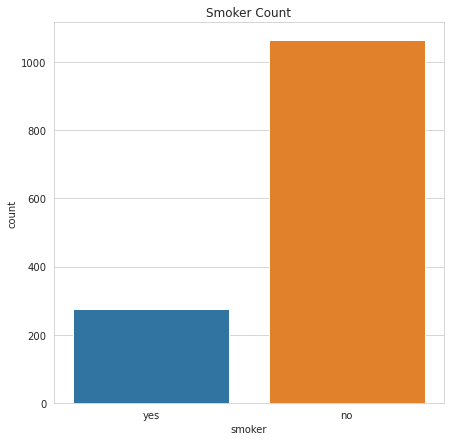

In [13]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'smoker', data=df)
plt.title('Smoker Count')
plt.show()

#### Region Count

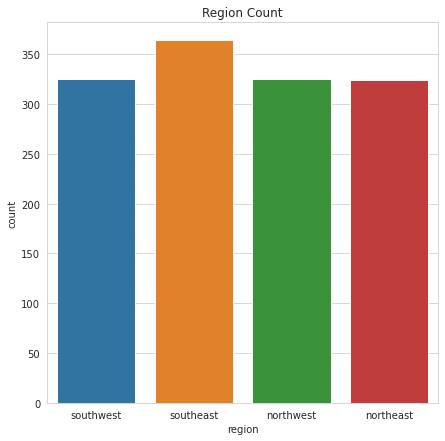

In [14]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'region', data=df)
plt.title('Region Count')
plt.show()

#### Charges distribution

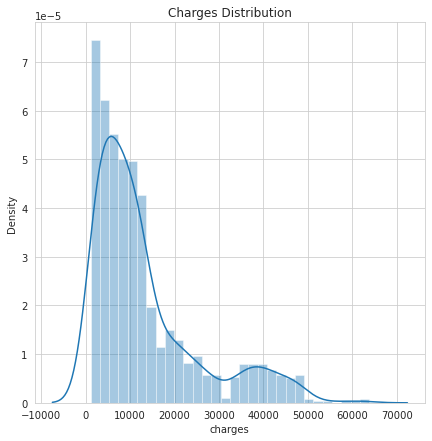

In [15]:
plt.figure(figsize=(7, 7))
sns.distplot(df.charges, kde = True)
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing

#### Encoding the categorial features

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [17]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Splitting the data into independent and dependent variable

In [18]:
X = df.drop('charges', axis = 1)
y = df.charges

### Splitting the data into training and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the random forest regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_preds_train = rfr.predict(X_train)
y_preds_train

array([ 9530.1729744,  9882.4594671, 21506.0113613, ..., 12503.2012743,
       45017.8757433, 11082.2468482])

In [22]:
y_preds_test = rfr.predict(X_test)
y_preds_test

array([11214.7941991 ,  5298.5032446 , 28382.197646  ,  9559.5533129 ,
       34379.2918401 ,  9147.5504815 ,  2189.070476  , 14342.9156665 ,
        6645.63451   , 10695.2480026 , 19868.7630794 ,  7064.936101  ,
        4198.5660915 , 46451.1360415 , 48504.0546394 , 45087.8303941 ,
       10158.2400262 , 43541.6536207 ,  8589.6269445 , 25646.9073224 ,
        5749.9640562 , 10277.1141936 ,  2424.2484452 ,  2839.9217556 ,
       11562.1213161 , 11399.3903001 , 13630.4257308 ,  6284.5513888 ,
        9788.2362632 ,  3839.12504477,  7651.048089  , 11973.5068056 ,
        2512.7730516 ,  5464.7126547 ,  3592.1596112 , 11685.9074727 ,
        2866.7614933 ,  8003.7332718 , 23806.2917625 , 39034.524392  ,
        6389.0239114 ,  4676.1332346 , 12320.7746261 , 14745.617139  ,
        6265.4715221 , 15756.0586466 , 17374.1868416 ,  5929.6319998 ,
       42061.1521309 ,  6805.3379515 , 13836.6194735 ,  2349.7643673 ,
        6671.4324282 ,  1855.2488695 , 11560.8214462 , 11524.9129197 ,
      

In [23]:
train_score = rfr.score(X_train, y_train)
train_score

0.9766294398797567

In [24]:
test_score = rfr.score(X_test, y_test)
test_score

0.8642986255846851

### Visualizing the actual values and predicted values for training set

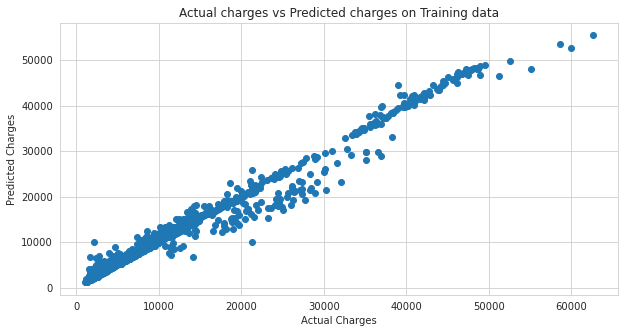

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_preds_train)
plt.title('Actual charges vs Predicted charges on Training data')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

### Visualizing the actual value and predicted values for test set

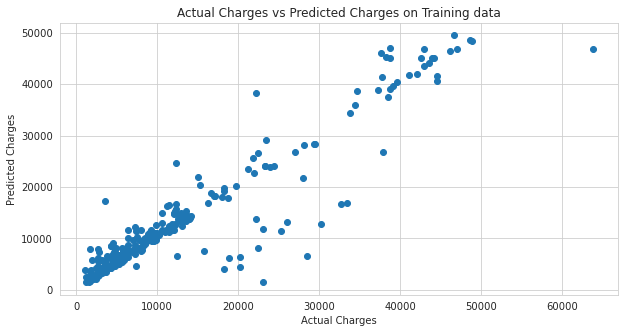

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_preds_test)
plt.title('Actual Charges vs Predicted Charges on Training data')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

### Now fitting other different models to the training set

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [29]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Linear Regession

In [31]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309 28048.59793155  9424.36324087
  5326.32232088 38460.06017922 40303.40597026 37147.01010262
 15287.91876684 35965.05485917  9179.1753067  31510.8319849
  3797.79068365 10070.82803304  2312.57551348  7074.41348194
 11352.37224357 12907.77079523 14448.84678727  6205.65997921
  9917.00839638  2239.50032819  9060.55469043 13120.56214535
  4617.70702822  3467.91218926  4402.74821855 12967.91608907
  1927.44498944  8757.9180081  33324.35180597 32638.47697026
  3852.41756615  4370.39670883 14080.76023234 11478.63402576
  8829.26135924 12046.15119133  5322.80515731  3100.71182484
 35546.60547574  9201.61196817 15894.23763341  2406.04003607
 12397.52052544  1433.90617387 13448.14094304 12519.54174599
  4295.28664609 32202.67982224 13263.171278   12842.10998145
 14111.93665793 10551.59361363 16298.16745307  7818.15570419
 

### 2. Random Forest Regression

In [32]:
fit_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [11112.9560359   5238.0343565  28420.651286   11496.6638001
 34489.4804588   9250.3103624   2165.379458   14518.2630487
  7122.2014133  10647.2087038  19986.4791456   7079.87129
  4587.452492   45435.6565863  48310.7157248  45231.3550976
 10120.3639175  43396.712603    9276.7186797  24238.6778208
  5245.6920938   9819.1354197   1789.9797818   2743.5064726
 12268.8893882  11932.8873992  13438.5239036   6504.0064692
 10641.6731065   3699.91600509  7788.1926457  12003.0205225
  2568.9137927   6138.5049933   3067.595034   11151.9990908
  3115.2678447   8231.328034   23911.2928095  39396.4327565
  7739.4583842   3836.5006961  12643.0905048  13945.2786584
  6400.7149687  16539.5407751  16126.7853642   4925.5003545
 41732.5269603   6619.9815317  14022.0041566   1846.6855824
  6942.203688    1738.9749185  11815.5789531  11017.1807885
  3802.7722958  45907.7159579  13092.4827012  14673.6450545
 13673.9140775   7362.1492713  20451.1310651   8056.0553807
 11579.2221333   6

### 3. Support Vector Regression

In [36]:
fit_model(SVR(kernel='poly'), X_train, X_test, y_train, y_test)

The predicted values:
  [ 9022.8919659   8622.03943935 10810.36359415  9108.36632129
  8044.19656684  8796.46666252  7972.16559291 11414.94243351
  8120.09071668  9421.24090213  8274.67951257  8916.57651058
  8312.38318917  9648.39535569 11063.97688141  9612.35652053
  9931.23430762  9529.76863765  9175.25404465  8941.81392205
  8116.99377662  9102.99304866  8031.81846058  8204.86610457
  9480.88908475 10002.65426732 10761.42082062  8253.75224653
  9201.08447242  8008.45082172  8827.54983239 10268.8104731
  8121.45860888  8211.76214631  8215.57777446  9469.49108345
  8042.46624646  9025.6644237   9501.07319141  8736.31478555
  8018.87121106  8112.95745406 10347.61955273 10190.66643082
  8591.15760827 10287.61555862  8109.47323444  8120.29748108
  9202.21053546  8544.63243822 11193.42129098  8003.00546377
  9142.29756249  7979.10286416 10283.27928311  9620.31934126
  8286.43993585  8472.64852527 10437.21162432  9930.23646329
 10951.07234509  8584.66876466 10939.72478184  8833.95280962
 

### 4. XGB Regression

In [34]:
fit_model(XGBRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [ 9952.002    8006.149   31733.793    9106.456   32759.762    5811.8384
   934.72034 13923.816    3368.3289  10390.483   21790.98    10314.691
  4455.6772  44994.36    47582.145   42441.773    8651.279   42901.22
  9143.483   24500.207    3147.9011   8845.929     299.23764  2217.689
 11827.646   12958.314   13419.277    6353.491    9468.46     4402.771
  8389.459   13271.873    2500.2183   4113.619    4052.427    9744.533
  2632.113    6532.2866  26423.818   38255.848    6093.879    4089.6902
 12491.879   13031.254    7283.2056  12648.211   12788.192    5423.895
 41580.32     7975.2793  12391.434    2161.631    5414.5317   1343.9741
 10799.222   10173.212    1954.8982  39415.434   13570.195   13830.7705
 13389.605    4668.3345  19838.75    11453.604   11997.759    5547.64
 16536.43    13684.498    3971.5195   1968.5654   7525.9546  13186.116
 11113.013    7669.0728   8872.386    4977.7925   8039.34    12225.466
  5591.512   10242.001    1522.5005  27522.053    8